In [1]:
import os
import math
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
from scipy.stats import randint
from scipy.stats import loguniform
from IPython.display import display
import csv
import boto3
import matplotlib.pyplot as plt

## Download Dataset Files

In [2]:
!aws s3 cp 's3://projectads508/aisles/aisles.csv' ./data-clarify/
!aws s3 cp 's3://projectads508/departments/departments.csv' ./data-clarify/
!aws s3 cp 's3://projectads508/prior/order_products__prior.csv' ./data-clarify/
!aws s3 cp 's3://projectads508/train/order_products__train.csv' ./data-clarify/
!aws s3 cp 's3://projectads508/orders/orders.csv' ./data-clarify/
!aws s3 cp 's3://projectads508/products/products.csv' ./data-clarify/


download: s3://projectads508/aisles/aisles.csv to data-clarify/aisles.csv
download: s3://projectads508/departments/departments.csv to data-clarify/departments.csv
download: s3://projectads508/prior/order_products__prior.csv to data-clarify/order_products__prior.csv
download: s3://projectads508/train/order_products__train.csv to data-clarify/order_products__train.csv
download: s3://projectads508/orders/orders.csv to data-clarify/orders.csv
download: s3://projectads508/products/products.csv to data-clarify/products.csv


## Import Data

In [3]:
df1 = pd.read_csv(
    "./data-clarify/products.csv")
df1.shape

(49688, 4)

In [4]:
df1.head(5)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [5]:
df2 = pd.read_csv(
    "./data-clarify/aisles.csv")
df2.shape

(134, 2)

In [6]:
df2.head(5)

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [7]:
df3 = pd.read_csv(
    "./data-clarify/departments.csv")
df3.shape

(21, 2)

In [8]:
df3.head(5)

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [9]:
df4 = pd.read_csv(
    "./data-clarify/order_products__train.csv")
df4.shape

(1384617, 4)

In [10]:
df4.head(5)

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [11]:
df5 = pd.read_csv(
    "./data-clarify/orders.csv")
df5.shape

(3421083, 7)

In [12]:
df5.head(5)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


## Combine Data Frames

In [13]:

df12 = pd.merge(df2, df1, how='inner', on='aisle_id')
df123 = pd.merge(df12, df3, how='inner', on='department_id')
df1234 = pd.merge(df4, df123, how='inner', on='product_id')
df12345 = pd.merge(df5, df1234, how='inner', on='order_id')

In [14]:
df = df12345.drop(['aisle_id','department_id','eval_set','order_number'],axis=1)
display(df.head())

,order_id,user_id,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle,product_name,department
0,1187899,1,4,8,14.0,49235,10,1,cream,Organic Half & Half,dairy eggs
1,1187899,1,4,8,14.0,46149,11,1,soft drinks,Zero Calorie Cola,beverages
2,1187899,1,4,8,14.0,196,1,1,soft drinks,Soda,beverages
3,1187899,1,4,8,14.0,27845,9,0,milk,Organic Whole Milk,dairy eggs
4,1187899,1,4,8,14.0,38928,3,1,yogurt,0% Greek Strained Yogurt,dairy eggs


In [15]:
df.shape

(1384617, 11)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


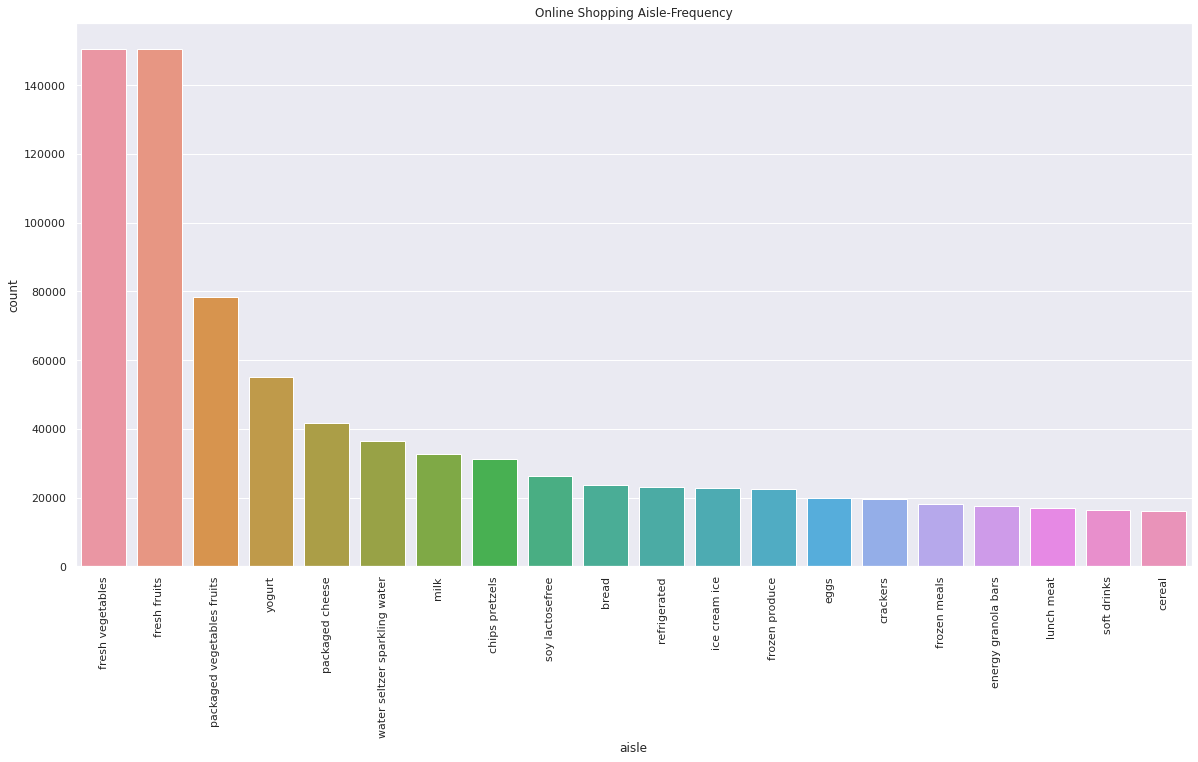

In [16]:
# analyze the aisle distribution

sns.set(rc={"figure.figsize": (20.0, 10.0)})
sns.countplot(df.aisle, order=df.aisle.value_counts().index[:20])
plt.title('Online Shopping Aisle-Frequency')
plt.xticks(rotation=90)
plt.show()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


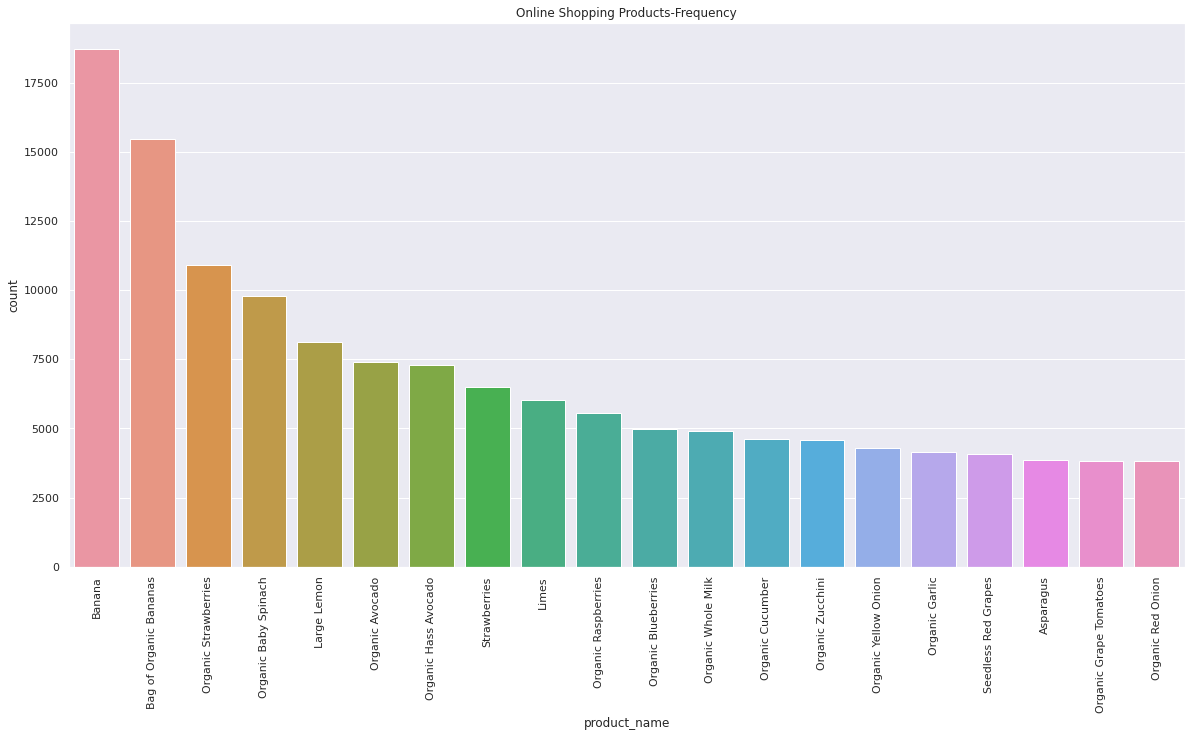

In [17]:
# analyze the products distribution

sns.countplot(df.product_name, order=df.product_name.value_counts().index[:20])
plt.title('Online Shopping Products-Frequency')
plt.xticks(rotation=90)
plt.show()

## visualize data

<AxesSubplot:xlabel='reordered', ylabel='count'>

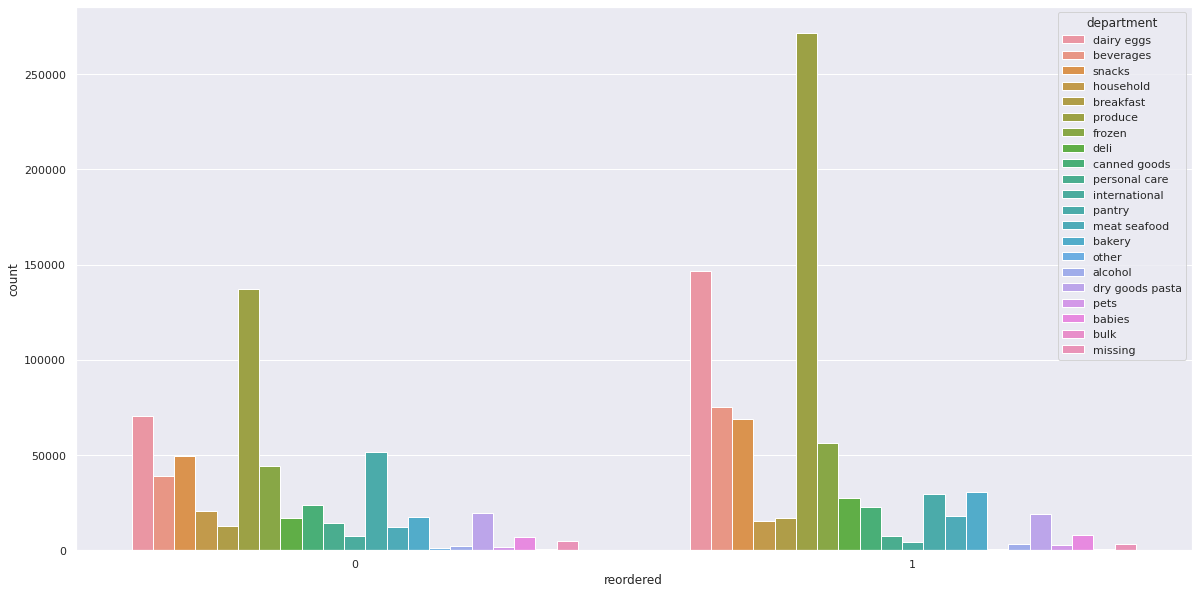

In [18]:
# the distribution of department categories across reordered column
import seaborn as sns

sns.countplot(data=df, x="reordered", hue="department")

# Balance the Dataset 

In [19]:
df_grouped_by = df.groupby(["department", "reordered"])[["department", "reordered"]]
df_balanced = df_grouped_by.apply(lambda x: x.sample(df_grouped_by.size().min()).reset_index(drop=True))
df_balanced.shape

(24066, 2)

<AxesSubplot:xlabel='reordered', ylabel='count'>

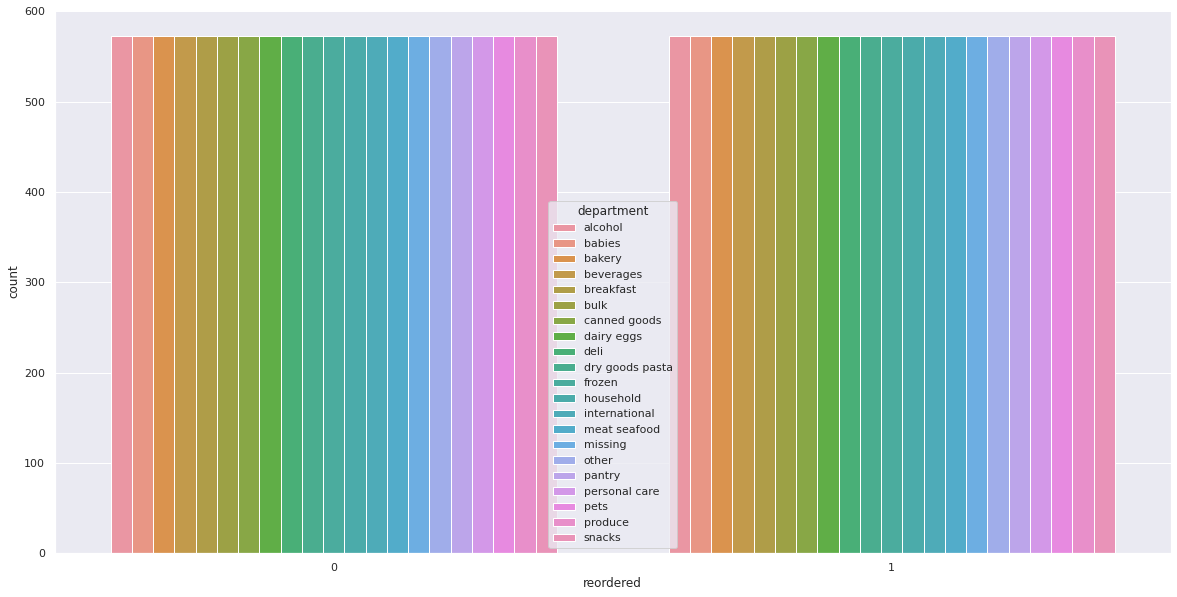

In [20]:
sns.countplot(data=df_balanced, x="reordered", hue="department")

In [21]:
df_balanced.head(5)

department  reordered
department reordered                        
alcohol    0         0    alcohol          0
                     1    alcohol          0
                     2    alcohol          0
                     3    alcohol          0
                     4    alcohol          0

# Write a CSV with Header

### Unbalanced label classes

In [22]:
df.shape

(1384617, 11)

In [23]:
path = "./data-clarify/integrated_data.csv"
df.to_csv(path, index=False, header=True)

### Balanced label classes

In [24]:
df_balanced.shape

(24066, 2)

In [25]:
path_balanced = "./data-clarify/integrated_data_balanced.csv"
df_balanced.to_csv(path_balanced, index=False, header=True)

## Write as JSONLINES

In [26]:
path_jsonlines = "./data-clarify/integrated_data_balanced.jsonl"
df_balanced.to_json(path_or_buf=path_jsonlines, orient="records", lines=True)

## Upload Train Data to S3

In [27]:
import sagemaker
sess = sagemaker.Session()
bucket = sess.default_bucket()
role = sagemaker.get_execution_role()
region = boto3.Session().region_name
from pyathena import connect

In [28]:
import time

timestamp = int(time.time())

bias_data_s3_uri = sess.upload_data(bucket=bucket, key_prefix="bias-detection-{}".format(timestamp), path=path)
bias_data_s3_uri

's3://sagemaker-us-east-1-254716743917/bias-detection-1650234746/integrated_data.csv'

In [29]:
!aws s3 ls $bias_data_s3_uri

2022-04-17 22:32:27  116800354 integrated_data.csv


In [30]:
balanced_bias_data_s3_uri = sess.upload_data(
    bucket=bucket, key_prefix="bias-detection-{}".format(timestamp), path=path_balanced
)
balanced_bias_data_s3_uri

's3://sagemaker-us-east-1-254716743917/bias-detection-1650234746/integrated_data_balanced.csv'

In [31]:
!aws s3 ls $balanced_bias_data_s3_uri

2022-04-17 22:32:29     267039 integrated_data_balanced.csv


In [32]:
balanced_bias_data_jsonlines_s3_uri = sess.upload_data(
    bucket=bucket, key_prefix="bias-detection-{}".format(timestamp), path=path_jsonlines
)
balanced_bias_data_jsonlines_s3_uri

's3://sagemaker-us-east-1-254716743917/bias-detection-1650234746/integrated_data_balanced.jsonl'

In [33]:
!aws s3 ls $balanced_bias_data_jsonlines_s3_uri

2022-04-17 22:32:30     964931 integrated_data_balanced.jsonl


## Store Variables for Next Notebook(s)

In [34]:
%store balanced_bias_data_jsonlines_s3_uri

Stored 'balanced_bias_data_jsonlines_s3_uri' (str)


In [35]:
%store balanced_bias_data_s3_uri

Stored 'balanced_bias_data_s3_uri' (str)


In [36]:
%store bias_data_s3_uri

Stored 'bias_data_s3_uri' (str)


In [37]:
%store

Stored variables and their in-db values:
balanced_bias_data_jsonlines_s3_uri             -> 's3://sagemaker-us-east-1-254716743917/bias-detect
balanced_bias_data_s3_uri                       -> 's3://sagemaker-us-east-1-254716743917/bias-detect
bias_data_s3_uri                                -> 's3://sagemaker-us-east-1-254716743917/bias-detect
database_name                                   -> 'oneclickaws'
ingest_create_athena_db_passed                  -> True
s3_public_path_csv                              -> 's3://projectads508'
